In [7]:
import json

# Read JSON data from a file
with open('/home/said/projects/handwriting-datasets/project-1-at-2023-06-13-20-22-08d03e05.json') as file:
    data = json.load(file)

count = 0
for item in data:
    if "transcription" in item:
        count += len(item["transcription"])

print("Total transcriptions:", count)


# convert from LS percent units to pixels 
def convert_from_ls(result):
    if 'original_width' not in result or 'original_height' not in result:
        return None

    #value = result['value']
    w, h = result['original_width'], result['original_height']

    
    return w * result['x'] / 100.0, \
            h * result['y'] / 100.0, \
            w * result['width'] / 100.0, \
            h * result['height'] / 100.0

Total transcriptions: 453


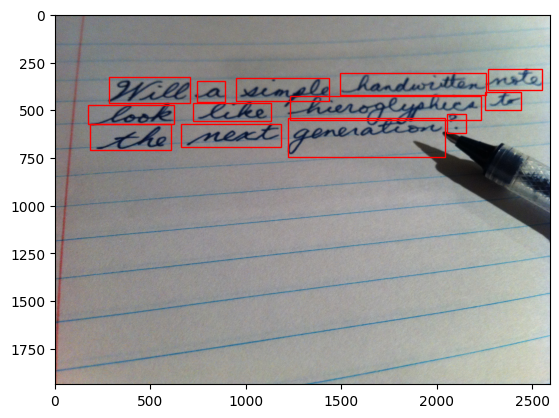

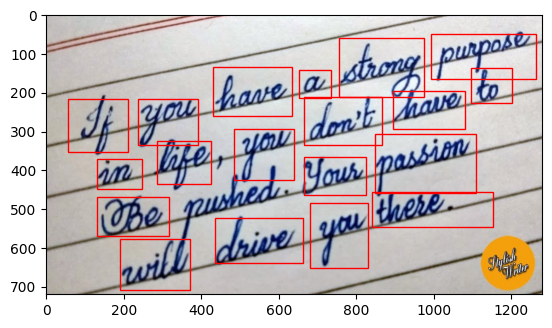

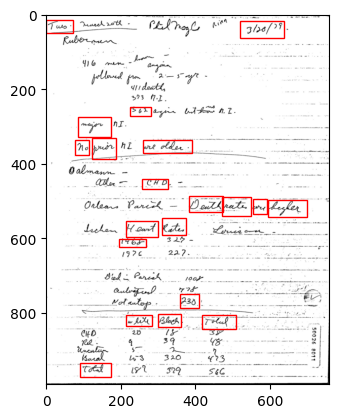

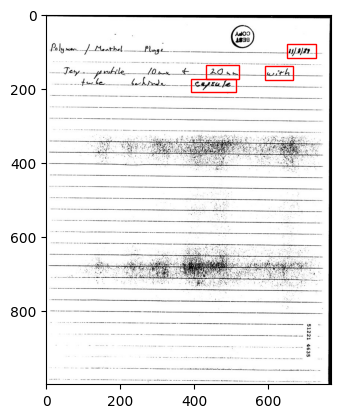

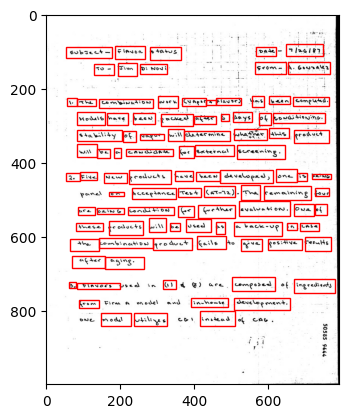

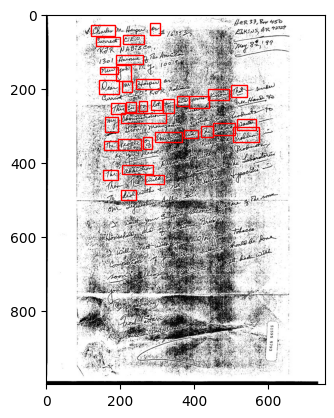

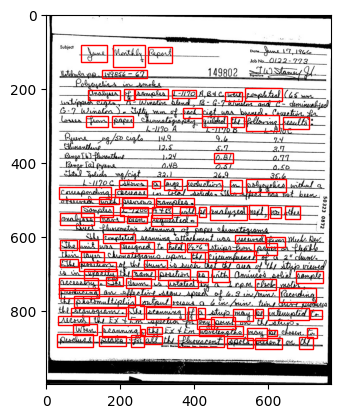

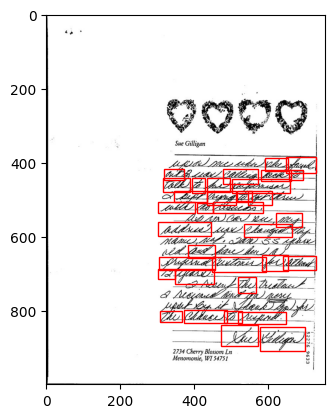

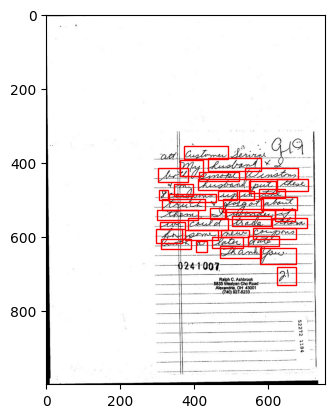

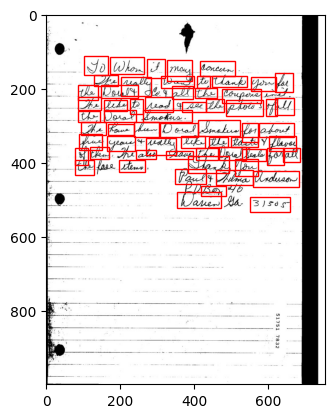

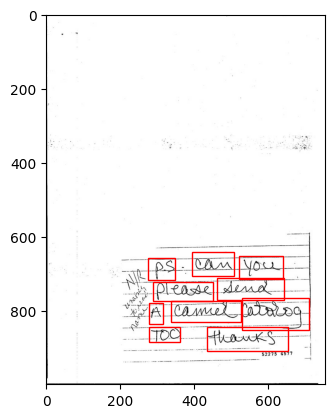

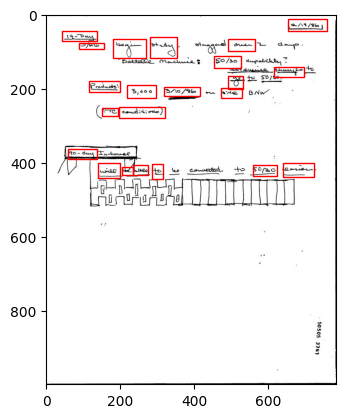

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for item in data:
    # Load the image
    image_path = '/home/said/.local/share/label-studio/media/upload/1/' + item.get('ocr').split('/')[-1]
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(image_rgb)

    if "bbox" in item and "transcription" in item:
        bbox = item["bbox"]
        transcription = item["transcription"]

        # Convert bounding box coordinates from LS percent units to pixels
        converted_bbox = [convert_from_ls(b) for b in bbox]

        for b, text in zip(converted_bbox, transcription):
            x, y, width, height = b

            # Create a rectangle patch
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

            # Add the rectangle to the plot
            ax.add_patch(rect)

            # Add label text
            #ax.text(x, y, text, color='g')

# Show the plot
plt.show()


In [3]:
bbox

[{'x': 5.410406936658364,
  'y': 4.241759038340157,
  'width': 12.202194367782692,
  'height': 2.888006153763511,
  'rotation': 0,
  'original_width': 784,
  'original_height': 1000},
 {'x': 11.396389079344214,
  'y': 7.581016153629218,
  'width': 8.40339800800129,
  'height': 1.6245034614919742,
  'rotation': 0,
  'original_width': 784,
  'original_height': 1000},
 {'x': 22.907893199893927,
  'y': 6.498013845967901,
  'width': 11.51150412054971,
  'height': 5.054010769086143,
  'rotation': 0,
  'original_width': 784,
  'original_height': 1000},
 {'x': 35.80077781490962,
  'y': 6.046762884442348,
  'width': 9.439143499978723,
  'height': 5.5955119229168,
  'rotation': 0,
  'original_width': 784,
  'original_height': 1000},
 {'x': 58.017980767570556,
  'y': 11.191023845833591,
  'width': 9.324898095389285,
  'height': 3.0685065383737293,
  'rotation': 0,
  'original_width': 784,
  'original_height': 1000},
 {'x': 14.734725274303631,
  'y': 17.959788268716835,
  'width': 10.7056988321112

In [4]:
len(transcription), len(bbox)

(22, 22)

In [23]:
import os
import cv2

def convert_bounding_boxes(data, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(os.path.join(output_folder, 'images'), exist_ok=True)

    labels_file = os.path.join(output_folder, 'labels.txt')
    with open(labels_file, 'w') as f:
        i = 0
        for item in data:
            if "bbox" in item and "transcription" in item and "ocr" in item:
                bbox = item["bbox"]
                transcription = item["transcription"]
                image_path = '/home/said/.local/share/label-studio/media/upload/1/' + item["ocr"].split('/')[-1]
                image = cv2.imread(image_path)

                for b, text in zip(bbox, transcription):
                    x, y, width, height = convert_from_ls(b)

                    # Crop the image using the bounding box coordinates
                    word_image = image[int(y):int(y+height), int(x):int(x+width)]

                    # Save the cropped image
                    word_image_path = os.path.join(output_folder, 'images', f'{i}.jpg')
                    i += 1
                    cv2.imwrite(word_image_path, word_image)

                    # Write label and image path to the labels file
                    f.write(f"{word_image_path.split('/')[-1]}\t{text}\n")

    print(f"Cropped images and labels saved to {output_folder}")

In [24]:
output_folder = './custom_data/'
convert_bounding_boxes(data, output_folder)

Cropped images and labels saved to ./custom_data/


In [25]:
! rm *.jpg